# Process Test Logs
Before you start, upload test output logs first. For example, `drln_log.txt` and `rdn_log.txt`
The logs should contain outputs in the following format:
```
----- Experiment: RDN_50epoch_AblateCMLRLGFF_Bicubic -----
Branch 'rdn-ablate-cm-lrl-gff' set up to track remote branch 'rdn-ablate-cm-lrl-gff' from 'origin'.
Switched to a new branch 'rdn-ablate-cm-lrl-gff'
Making model...
Loading model from /content/RDN_50epoch_AblateCMLRLGFF_Bicubic/model/model_best.pt
Trainable model parameter count:
28336515

Evaluation:
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.23it/s]
[MyImage x2]	PSNR: 34.833 (Best: 34.833 @epoch 1)
[MyImage x2]	SSIM: 0.838
Total time: 2.25s, ave time: 0.45s
```

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
'''
Set 5: {
    RDN_50epoch_Baseline_Bicubic: {
        PSNR: xx
        SSIM: xx
    }
}
'''
def process_results(logfile):
  f = open(logfile, "r")
  lines = f.readlines()
  results = {}

  test_name = None
  experiment_name = None
  for line in lines:
      if line.startswith('*'):
          test_name = line.split(':')[1].split()[0]
          results[test_name] = {}
      if line.startswith('-'):
          experiment_name = line.split(':')[1].split()[0]
          results[test_name][experiment_name] = {}
      if line.startswith('['):
          if line.find('PSNR') != -1:
              psnr = float(line.split('\t')[1].split()[1])
              results[test_name][experiment_name]['PSNR'] = psnr
          if line.find('SSIM') != -1:
              ssim = float(line.split('\t')[1].split()[1])
              results[test_name][experiment_name]['SSIM'] = ssim

  return results

In [ ]:
FILE_EXPNAME = {
          'RDN_50epoch_Baseline_Bicubic': 'RDN Baseline',
          'RDN_50epoch_AblateCMLRLGFF_Bicubic': 'RDN w/o CM,LRL,GFF',
          'RDN_50epoch_AblateLRLGFF_Bicubic':'RDN w/o LRL,GFF',
          'RDN_50epoch_AblateCMGFF_Bicubic':'RDN w/o CM,GFF',
          'RDN_50epoch_AblateCMLRL_Bicubic':'RDN w/o CM,LRL',
          'RDN_50epoch_AblateGFF_Bicubic':'RDN w/o GFF',
          'RDN_50epoch_AblateLRL_Bicubic':'RDN w/o LRL',
          'RDN_50epoch_AblateCM_Bicubic':'RDN w/o CM',
          'RDN_50epoch_ShortSkipConn_Bicubic':'RDN + SSC',
          'RDN_50epoch_Laplacian_Bicubic':'RDN + LA',
          'RDN_50epoch_ResidualBlock_Bicubic':'RDN + RB',
          'RDN_50epoch_CascadingBlock_Bicubic':'RDN + CC',
          'RDN_50epoch_BaselineD16C8G64_Bicubic': 'RDN Baseline D16C8G64',
          'RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic': 'RDN w/o CM,LRL,GFF D16C8G64',
          'DRLN_50epoch_Baseline_Model':'DRLN Baseline',
          'DRLN_50epoch_No_Everything_Model':'DRLN w/o SSC,LSC,LA',
          'DRLN_50epoch_No-Laplacian_Model':'DRLN w/o LA',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model':'DRLN w/o LSC,LA',
          'DRLN_50epoch_No_Long_Skip_Conn_Model':'DRLN w/o LSC',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model':'DRLN w/o SSC,LSC',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model':'DRLN w/o SSC,LA',
          'DRLN_50epoch_no_medium_skip_conn_Model':'DRLN w/o SSC',
}

In [ ]:
rdn_ordered = [
          'RDN_50epoch_Baseline_Bicubic',
          'RDN_50epoch_AblateCMLRLGFF_Bicubic',
          'RDN_50epoch_AblateLRLGFF_Bicubic',
          'RDN_50epoch_AblateCMGFF_Bicubic',
          'RDN_50epoch_AblateCMLRL_Bicubic',
          'RDN_50epoch_AblateGFF_Bicubic',
          'RDN_50epoch_AblateLRL_Bicubic',
          'RDN_50epoch_AblateCM_Bicubic',
          'RDN_50epoch_CascadingBlock_Bicubic',
          'RDN_50epoch_ShortSkipConn_Bicubic',
          'RDN_50epoch_ResidualBlock_Bicubic',
          'RDN_50epoch_Laplacian_Bicubic',
         ]
drln_ordered = [
          'DRLN_50epoch_Baseline_Model',
          'DRLN_50epoch_No_Everything_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model', # LSC, LA
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model', # SSC, LA
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model', # SSC, LSC
          'DRLN_50epoch_No-Laplacian_Model', 
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model',
         ]

In [ ]:
def plot_results(results, model_names_ordered):
  fig, axs = plt.subplots(len(results.keys()), 2, figsize=(10, 8), dpi=160, sharex=True)

  val_types = ['PSNR', 'SSIM']
  for i, test_name in enumerate(results):
    for j, val_type in enumerate(val_types):
      experiments = results[test_name]

      offset = 0.5 if j == 0 else 0.05
      colors = []   
      for exp_name in model_names_ordered:
        if exp_name.find('Baseline') != -1:
          colors.append('r')
        elif exp_name.find('Ablate') != -1 or exp_name.startswith('DRLN'):
          colors.append('g')
        else:
          colors.append('b')

      experiment_names = [FILE_EXPNAME[name] for name in model_names_ordered]
      psnrs = [exp[val_type] for exp in experiments.values()]
      psnrs = [experiments[name][val_type] for name in model_names_ordered]

      axs[i, j].set_title(test_name + ' ' + val_type)
      rects = axs[i, j].bar(experiment_names, psnrs, width=0.2, color=colors)
      axs[i, j].set_ylim([min(psnrs)-offset, max(psnrs)+offset])

      autolabel(rects, axs[i, j])

  for ax in axs.flat:
      ax.set_xticklabels(experiment_names, rotation=40, ha='right')
  


In [ ]:
def autolabel(rects, ax, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.005*height,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize='xx-small')

In [ ]:
def plot_rdn_paper():

  offset = 0.5
  colors = []   

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  experiment_names = [
                      'wo CM,LRL,GFF',
                      'wo LRL,GFF',
                      'wo CM,GFF',
                      'wo CM,LRL',
                      'wo GFF',
                      'wo LRL',
                      'wo GCM',
                      'Baseline'
  ]
  psnrs = [34.87, 37.89, 37.92, 37.78, 37.99, 37.98, 37.97, 38.06]

  ax.set_title('RDN Paper Abation Results')
  rects = ax.bar(experiment_names, psnrs, width=0.2)
  ax.set_ylim([min(psnrs)-offset, max(psnrs)+offset])

  autolabel(rects, ax)
  plt.show()

def plot_drln_paper():

  offset = 0.5
  colors = []   

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  experiment_names = [
                      'wo LA',
                      'wo SSC,LA',
                      'wo SSC',
                      'wo SSC,LSC,LA',
                      'wo LSC,LA',
                      'Baseline'
  ]
  psnrs = [32.30, 31.85, 32.12, 31.97, 32.10, 32.37]

  ax.set_title('DRLN Paper Ablation Results')
  rects = ax.bar(experiment_names, psnrs, width=0.2)
  ax.set_ylim([min(psnrs)-offset, max(psnrs)+offset])

  autolabel(rects, ax)
  plt.show()

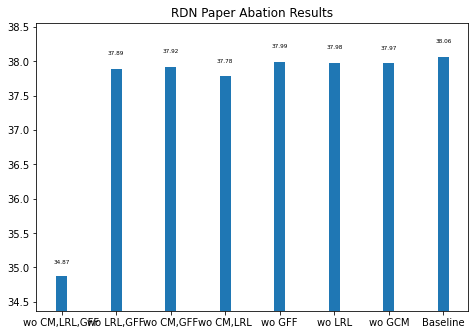

In [ ]:
plot_rdn_paper()

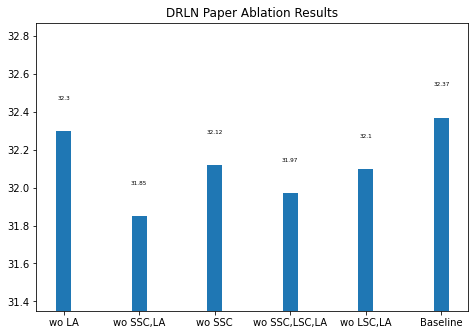

In [ ]:
plot_drln_paper()

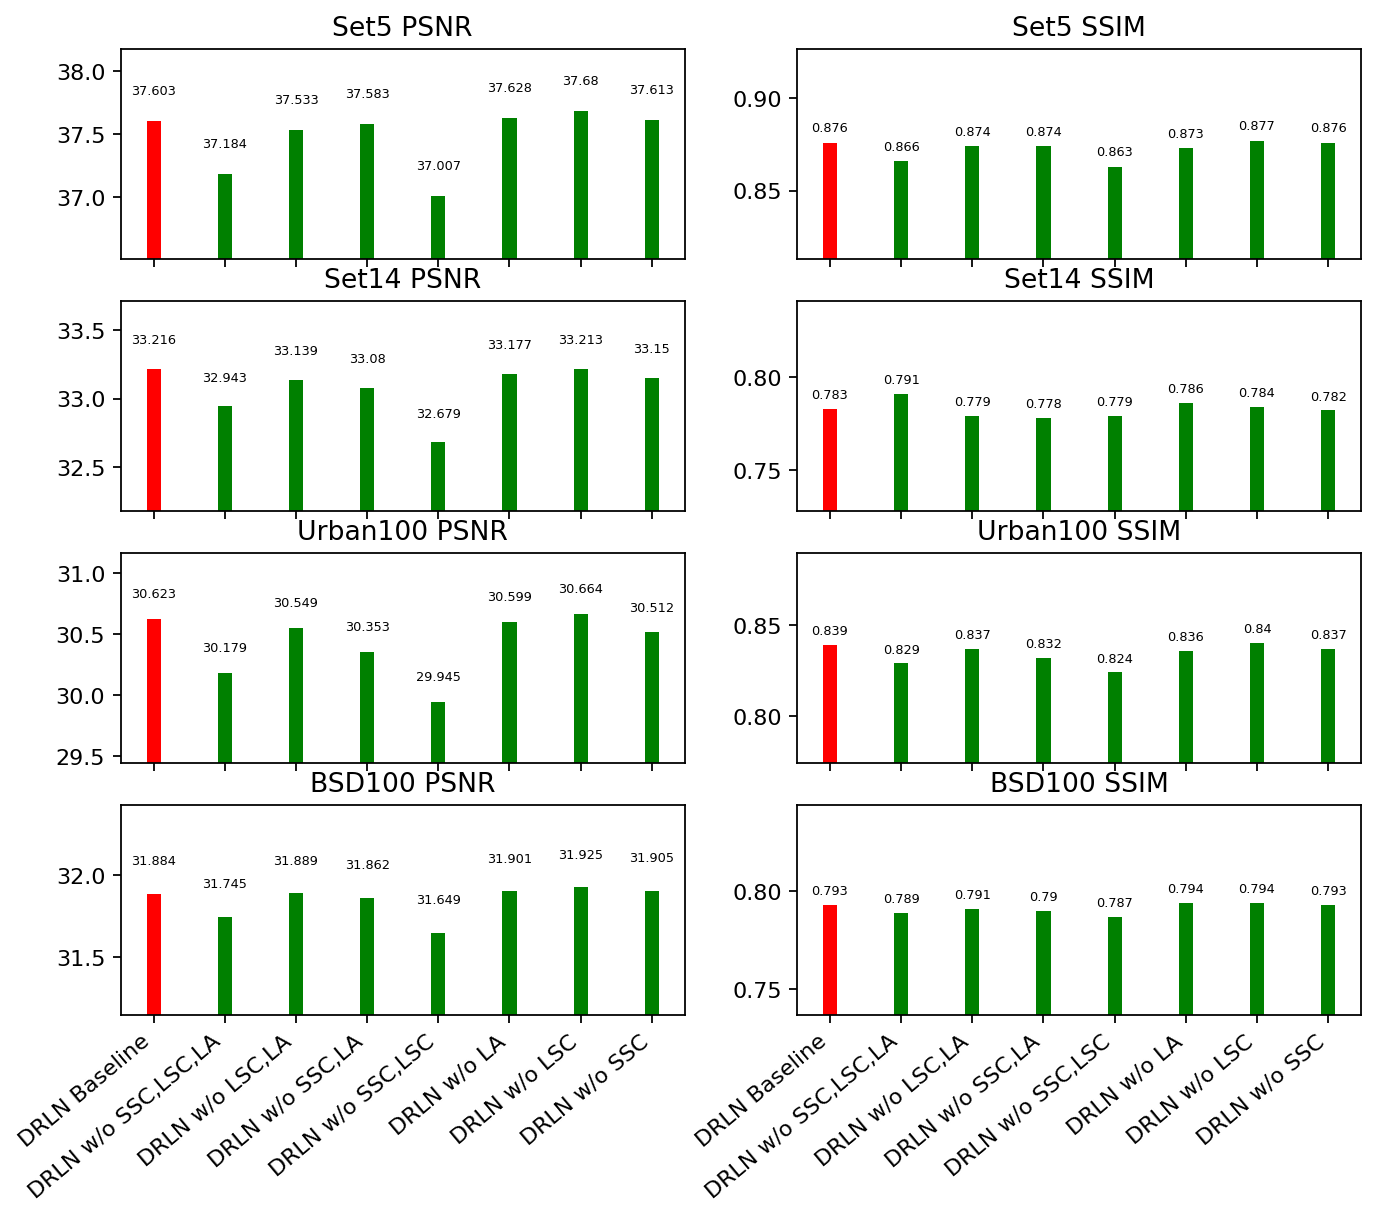

In [ ]:
plot_results(process_results('drln_log.txt'), drln_ordered)

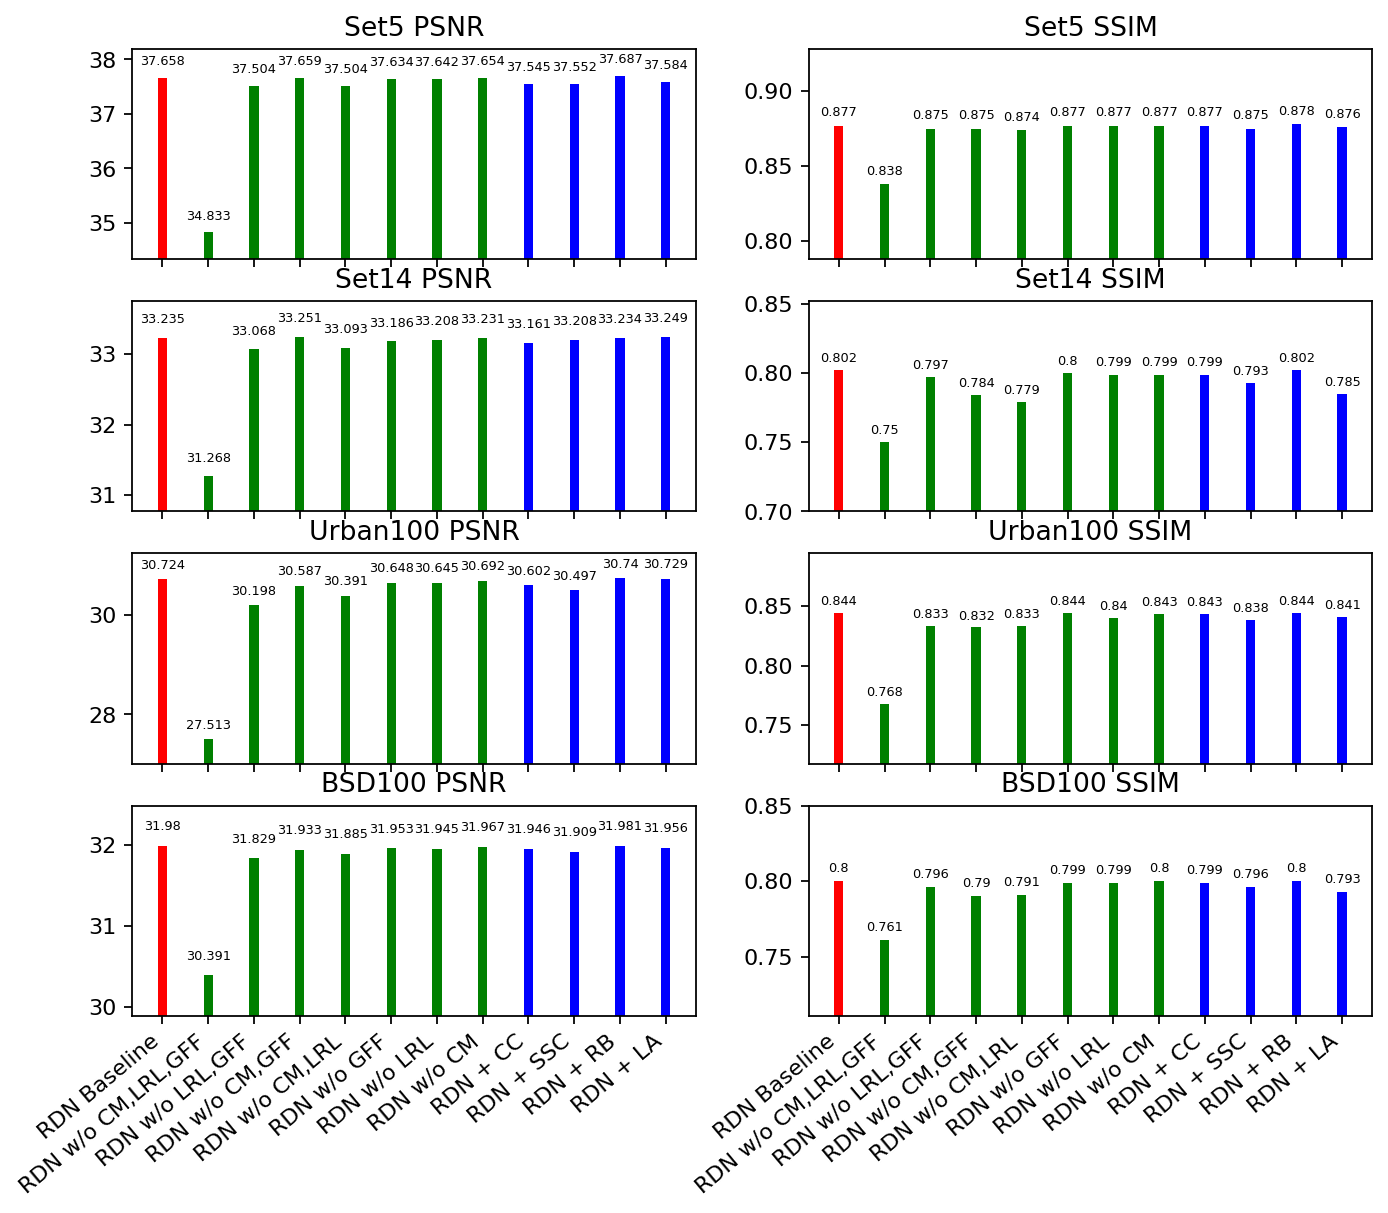

In [ ]:
plot_results(process_results('rdn_log_fix_gff.txt'), rdn_ordered)

In [ ]:
process_results('rdn_log.txt')

{'BSD100': {'RDN_50epoch_AblateCMGFF_Bicubic': {'PSNR': 31.933, 'SSIM': 0.79},
  'RDN_50epoch_AblateCMLRLGFF_Bicubic': {'PSNR': 30.391, 'SSIM': 0.761},
  'RDN_50epoch_AblateCMLRL_Bicubic': {'PSNR': 31.885, 'SSIM': 0.791},
  'RDN_50epoch_AblateCM_Bicubic': {'PSNR': 31.967, 'SSIM': 0.8},
  'RDN_50epoch_AblateGFF_Bicubic': {'PSNR': 31.953, 'SSIM': 0.799},
  'RDN_50epoch_AblateLRLGFF_Bicubic': {'PSNR': 31.829, 'SSIM': 0.796},
  'RDN_50epoch_AblateLRL_Bicubic': {'PSNR': 31.945, 'SSIM': 0.799},
  'RDN_50epoch_Baseline_Bicubic': {'PSNR': 31.98, 'SSIM': 0.8},
  'RDN_50epoch_CascadingBlock_Bicubic': {'PSNR': 31.946, 'SSIM': 0.799},
  'RDN_50epoch_Laplacian_Bicubic': {'PSNR': 31.956, 'SSIM': 0.793},
  'RDN_50epoch_ResidualBlock_Bicubic': {'PSNR': 31.981, 'SSIM': 0.8},
  'RDN_50epoch_ShortSkipConn_Bicubic': {'PSNR': 31.909, 'SSIM': 0.796}},
 'Set14': {'RDN_50epoch_AblateCMGFF_Bicubic': {'PSNR': 33.251, 'SSIM': 0.784},
  'RDN_50epoch_AblateCMLRLGFF_Bicubic': {'PSNR': 31.268, 'SSIM': 0.75},
  'RDN_